SIMPLE REGRESSION MODEL & KERNEL SHAP

# Import packages

In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras import layers, Model, optimizers, callbacks, losses, metrics
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


# News Popularity Dataset

In [ ]:
data = pd.read_csv('/content/OnlineNewsPopularity.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


predict the number of times an article has been shared
simple regression model

In [ ]:
data.columns = [col.strip() for col in data.columns]

In [ ]:
data = data[data['shares']<10000]
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
data['shares'].describe(percentiles=[0.1, 0.5, 0.95])

,shares
count,37429.000000
mean,2022.382538
std,1758.059454
min,1.000000
10%,698.000000
50%,1400.000000
95%,6100.000000
max,9900.000000


95% is less than 10k

<Axes: ylabel='Frequency'>

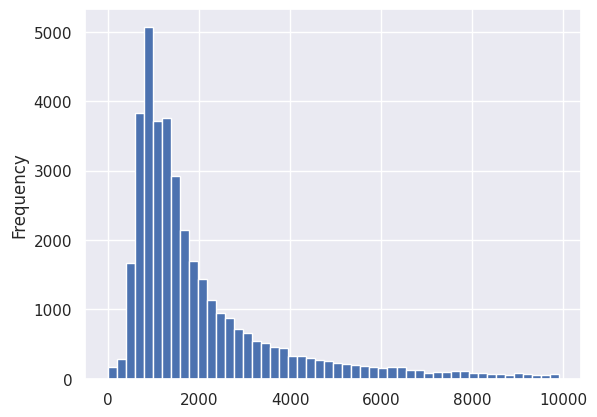

In [ ]:
data['shares'].plot.hist(bins=50)

**MTL problem:**

2 tasks, 2 target variables

* classification: if article will have more than 10k shares or not

* regression problem:

In [ ]:
high_share_thresh = 10000
data['high_shares_y_n'] = data['shares'].apply(lambda x: 1 if x>=high_share_thresh else 0)

In [ ]:
data.dtypes.value_counts()

,count
float64,59
int64,2
object,1


In [ ]:
data.drop('url', axis=1, inplace=True)
data.shape

(37429, 61)

In [ ]:
data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,high_shares_y_n
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [ ]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,high_shares_y_n
count,37429.000000,37429.000000,37429.000000,37429.000000,37429.000000,37429.000000,37429.000000,37429.000000,37429.000000,37429.000000,...,37429.000000,37429.000000,37429.000000,37429.000000,37429.000000,37429.000000,37429.000000,37429.000000,37429.000000,37429.0
mean,354.090812,10.396110,547.894520,0.549285,0.999145,0.691015,10.719923,3.300275,4.423442,1.210639,...,0.755822,-0.258272,-0.520341,-0.107097,0.279167,0.070082,0.341915,0.153610,2022.382538,0.0
std,214.924790,2.112443,466.970214,3.623177,5.383532,3.359729,11.072233,3.854216,8.178818,4.008505,...,0.246669,0.126837,0.289715,0.094545,0.322279,0.262139,0.188988,0.223678,1758.059454,0.0
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.0
25%,163.000000,9.000000,249.000000,0.470899,1.000000,0.626486,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.326304,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,925.000000,0.0
50%,337.000000,10.000000,413.000000,0.538653,1.000000,0.690667,7.000000,3.000000,1.000000,0.000000,...,0.800000,-0.251709,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000,0.0
75%,545.000000,12.000000,718.000000,0.607383,1.000000,0.754386,13.000000,4.000000,4.000000,1.000000,...,1.000000,-0.185943,-0.300000,-0.050000,0.500000,0.136364,0.500000,0.250000,2400.000000,0.0
max,731.000000,23.000000,7764.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,75.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,9900.000000,0.0


In [ ]:
unique_counts = pd.DataFrame()
counts = []
for col in data.columns:
  counts.append(data[col].nunique())

unique_counts['feature'] = data.columns
unique_counts['unique_count'] = counts
unique_counts = unique_counts.sort_values(by='unique_count')

# Preprocess Data

* preprocess for sake of neural network
* scaling

In [ ]:
targets = ['shares', 'high_shares_y_n']
features = [col for col in data.columns if col not in targets]

In [ ]:
X,y = data.drop(targets, axis=1), data[targets]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

y_train = y_train.astype('float')
y_test = y_test.astype('float')

In [ ]:
y_test['shares'].describe()

,shares
count,3743.000000
mean,2032.522843
std,1815.350684
min,1.000000
25%,913.000000
50%,1300.000000
75%,2400.000000
max,9900.000000


In [ ]:
unique_counts[unique_counts['unique_count']==2]

,feature,unique_count
12,data_channel_is_lifestyle,2
14,data_channel_is_bus,2
13,data_channel_is_entertainment,2
30,weekday_is_monday,2
31,weekday_is_tuesday,2
17,data_channel_is_world,2
15,data_channel_is_socmed,2
33,weekday_is_thursday,2
35,weekday_is_saturday,2
37,is_weekend,2


Scaling:
- only scale features with more than 2 unique values
- less than 2 are one-hot encoded

In [ ]:
scale_feats, do_not_scale = [], []

for feature in features:
  if X_train[feature].nunique()>2: #only for binary features
    scale_feats.append(feature)
  else:
    do_not_scale.append(feature)

In [ ]:
scaler = StandardScaler()

X_train.loc[:, scale_feats] = scaler.fit_transform(X_train[scale_feats])
X_test.loc[:, scale_feats] = scaler.transform(X_test[scale_feats])


output_scaler = StandardScaler()
y_train.loc[:, 'shares'] = [val[0] for val in output_scaler.fit_transform(y_train['shares'].values.reshape(-1,1))]
y_test.loc[:, 'shares'] = [val[0] for val in output_scaler.transform(y_test['shares'].values.reshape(-1,1))]

#Define Model Architecture

using tensorflow funcional api

In [ ]:
num_features = len(features)

shared_dense_units_list = [64, 32]
regression_dense_units_list = [64, 16]
classification_dense_units_list = [64, 16]

In [ ]:
from ast import mod
from os import name
def multi_task_model(num_features, shared_dense_units_list, regression_dense_units_list, classification_dense_units_list, batch_norm):

  #Input
  input_ = layers.Input(shape=(num_features,), name='Input')
  shared_x = layers.BatchNormalization(name=f'bn_input')(input_)

  # Shared layers
  for i, dense_units in enumerate(shared_dense_units_list):
    shared_x = layers.Dense(units = dense_units, name=f'shared_dense_{i+1}')(shared_x)
    shared_x = layers.ReLU(name=f'shared_relu_{i+1}')(shared_x)

    if batch_norm:
      shared_x = layers.BatchNormalization(name=f'shared_bn_{i+1}')(shared_x)

    shared_x = layers.Dropout(0.2, name=f'shared_dropout_{i+1}')(shared_x)

  # Regression Head
  if len(regression_dense_units_list)>0:
    regr_x = layers.Dense(units = regression_dense_units_list[0], name='regr_dense_1')(shared_x)
    regr_x = layers.ReLU(name='regr_relu_1')(regr_x)

  for i, dense_units in enumerate(regression_dense_units_list[1:]):
    regr_x = layers.Dense(units = dense_units, name=f'regr_dense_{i+2}')(regr_x)
    regr_x = layers.ReLU(name=f'regr_relu_{i+2}')(regr_x)

    if batch_norm:
      regr_x = layers.BatchNormalization(name=f'regr_bn_{i+1}')(regr_x)

    regr_x = layers.Dropout(0.2, name=f'regr_dropout_{i+1}')(regr_x)

  if len(regression_dense_units_list)>0:
    regr_output = layers.Dense(1, name='regr_out')(regr_x)
  else:
    regr_output = layers.Dense(1, name='regr_out')(shared_x)


  # Classification Head
  if len(classification_dense_units_list)>0:
    clsf_x = layers.Dense(units = classification_dense_units_list[0], name='clsf_dense_1')(shared_x)
    clsf_x = layers.ReLU(name='clsf_relu_1')(clsf_x)

    for i, dense_units in enumerate(classification_dense_units_list[1:]):
      clsf_x = layers.Dense(units = dense_units, name=f'clsf_dense_{i+2}')(clsf_x)
      clsf_x = layers.ReLU(name=f'clsf_relu_{i+2}')(clsf_x)

      if batch_norm:
        clsf_x = layers.BatchNormalization(name=f'clsf_bn_{i+1}')(clsf_x)

      clsf_x = layers.Dropout(0.2, name=f'clsf_dropout_{i+1}')(clsf_x)

    if len(classification_dense_units_list)>0:
      clsf_output = layers.Dense(1, name='p_clsf', activation='sigmoid')(clsf_x)
    else:
      clsf_output = layers.Dense(1, name='p_clsf', activation='sigmoid')(shared_x)



  model = Model(input_, [regr_output, clsf_output], name='model')
  return model

In [ ]:
# import graphviz
# model = tf.keras.models.load_model('')
# tf.keras.utils.plot_model(model, to_file='/content/mtl_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
def plot_metrics(model_history, metrics):

  n_cols = 2
  n_rows = int(np.ceil(len(metrics)/n_cols))

  fig, ax = plt.subplots(n_rows, n_cols, sharex=False, sharey=False, figsize=(12,5*n_rows))
  ax = np.array(ax)
  ax = ax.flatten()

  for i, metric in enumerate(metrics):
    ax[i].plot(model_history.history[metric], label='Training')
    ax[i].plot(model_history.history['val_'+metric], label='Validation')
    ax[i].set_title(f'{metric}')
    ax[i].legend()
    ax[i].set(xlabel = 'Epoch')

  fig.tight_layout()
  plt.show()

  return fig

In [ ]:
model = multi_task_model(num_features=num_features,
                         shared_dense_units_list=shared_dense_units_list,
                         regression_dense_units_list=regression_dense_units_list,
                         classification_dense_units_list=classification_dense_units_list,
                         batch_norm=False)

In [ ]:
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)  │ (None, 59)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_input            │ (None, 59)        │        236 │ Input[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared_dense_1      │ (None, 64)        │      3,840 │ bn_input[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared_relu_1       │ (None, 64)        │          0 │ shared_dense_1[0… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared_dropout_1    │ (None, 64)        │          0 │ shared_relu_1[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared_dense_2      │ (None, 32)        │      2,080 │ shared_dropout_1… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared_relu_2       │ (None, 32)        │          0 │ shared_dense_2[0… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared_dropout_2    │ (None, 32)        │          0 │ shared_relu_2[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regr_dense_1        │ (None, 64)        │      2,112 │ shared_dropout_2… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clsf_dense_1        │ (None, 64)        │      2,112 │ shared_dropout_2… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regr_relu_1 (ReLU)  │ (None, 64)        │          0 │ regr_dense_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clsf_relu_1 (ReLU)  │ (None, 64)        │          0 │ clsf_dense_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regr_dense_2        │ (None, 16)        │      1,040 │ regr_relu_1[0][0] │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clsf_dense_2        │ (None, 16)        │      1,040 │ clsf_relu_1[0][0] │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regr_relu_2 (ReLU)  │ (None, 16)        │          0 │ regr_dense_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clsf_relu_2 (ReLU)  │ (None, 16)        │          0 │ clsf_dense_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regr_dropout_1      │ (None, 16)        │          0 │ regr_relu_2[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clsf_dropout_1      │ (None, 16)        │          0 │ clsf_relu_2[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 12,494 (48.80 KB)

 Trainable params: 12,376 (48.34 KB)

 Non-trainable params: 118 (472.00 B)

#Train Model

In [ ]:
import tensorflow.keras.backend as K

def scaled_mse(y_true, y_pred):
  # diff between true label and predicted label
  error = y_true - y_pred

  # square of the error
  sqr_error = K.square(error)

  # mean of the square of the error
  mean_sqr_error = K.mean(sqr_error)

  return mean_sqr_error/3.

def output_form(data):
  regr = data['shares']
  regr = np.array(regr)
  clsf = data['high_shares_y_n']
  clsf = np.array(clsf)
  return [regr, clsf]

train_y = output_form(y_train)
test_y = output_form(y_test)

define optimizers before train model:
- loss functions for each class
- metrics for each class


In [ ]:
learning_rate = 1e-04

# compile model
optimizer = optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer,
              loss = {
                  'p_clsf': losses.BinaryCrossentropy(),
                  'regr_out': losses.MeanSquaredError()
              },
              metrics = {
                  'p_clsf': [metrics.AUC(name='auc')],
                  'regr_out': [metrics.RootMeanSquaredError(name='rmse'), metrics.MeanAbsolutePercentageError(name='mape')]
              })

In [ ]:
Epochs = 500 #early stop is enable to monitor val_loss. if it doesnt improve in 10 epochs, training stops

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min', min_delta=0.001)

In [ ]:
# fit model
history = model.fit(
    x=X_train.values,
    y=train_y,
    batch_size=64,
    epochs=Epochs,
    validation_data=(X_test.values, test_y),
    callbacks=[early_stop]
)

Epoch 1/500
527/527 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 1.8097 - p_clsf_auc: 0.0000e+00 - p_clsf_loss: 0.5087 - regr_out_loss: 1.3010 - regr_out_mape: 186.9176 - regr_out_rmse: 1.1369 - val_loss: 1.0955 - val_p_clsf_auc: 0.0000e+00 - val_p_clsf_loss: 0.0419 - val_regr_out_loss: 1.0548 - val_regr_out_mape: 118.4119 - val_regr_out_rmse: 1.0265
Epoch 2/500
527/527 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.0360 - p_clsf_auc: 0.0000e+00 - p_clsf_loss: 0.0314 - regr_out_loss: 1.0046 - regr_out_mape: 135.4022 - regr_out_rmse: 1.0023 - val_loss: 1.0450 - val_p_clsf_auc: 0.0000e+00 - val_p_clsf_loss: 0.0040 - val_regr_out_loss: 1.0424 - val_regr_out_mape: 113.0971 - val_regr_out_rmse: 1.0203
Epoch 3/500
527/527 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.9793 - p_clsf_auc: 0.0000e+00 - p_clsf_loss: 0.0069 - regr_out_loss: 0.9723 - regr_out_mape: 127.5592 - regr_out_rmse: 0.9860 - val_loss: 1.0330 - val_p_clsf_auc: 0.0000e+00 - val_p_clsf_loss: 0.0011 - val_regr_out_loss: 1.0332 - val_regr

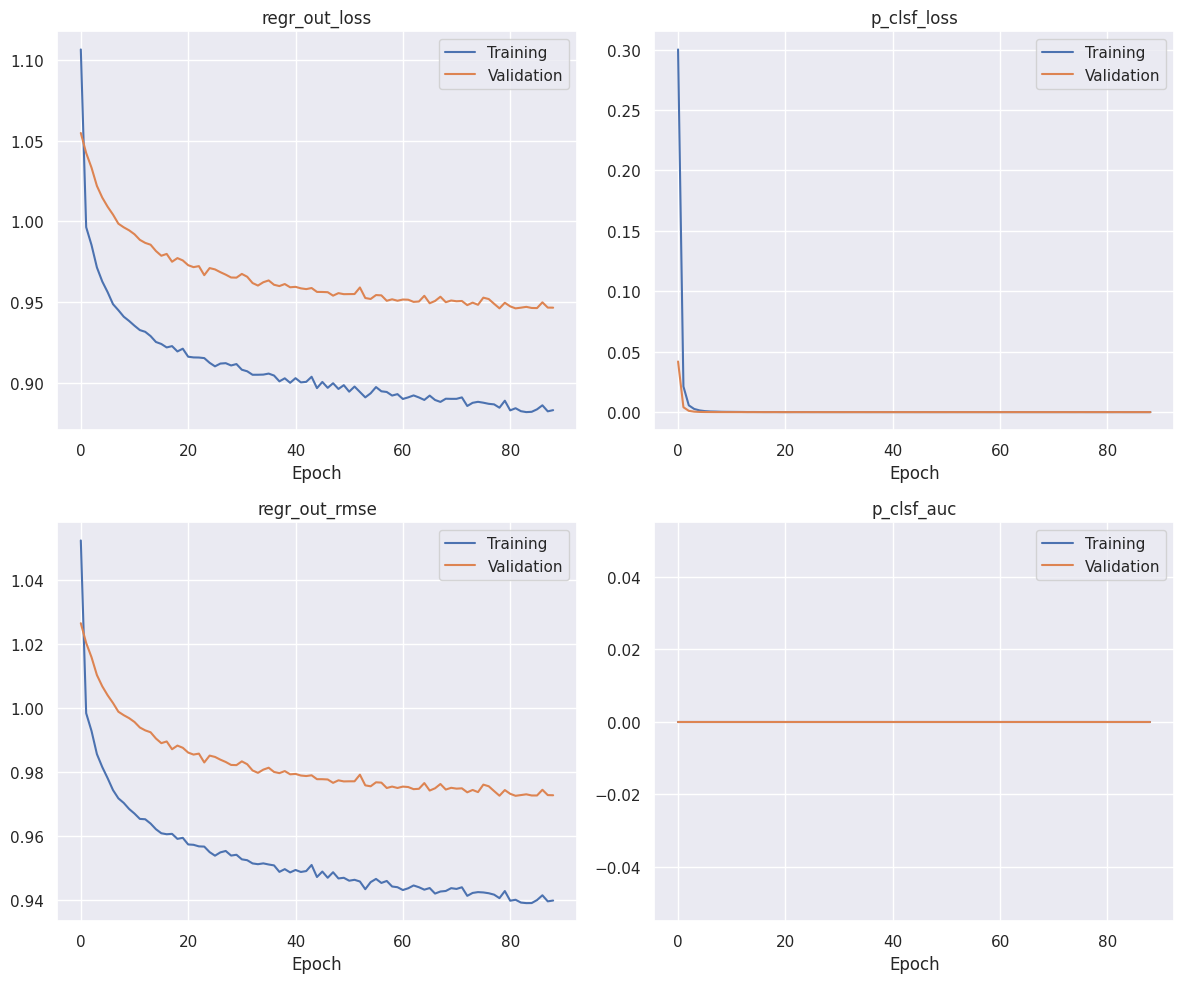

In [ ]:
fig = plot_metrics (history, metrics=['regr_out_loss', 'p_clsf_loss', 'regr_out_rmse', 'p_clsf_auc'])
plt.show()

In [ ]:
# model.save('/content/mtl_model')

In [ ]:
model.predict(X_test.loc[0:1, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


[array([[ 0.00481912],
        [-0.05979151]], dtype=float32),
 array([[4.7519466e-10],
        [3.1699368e-18]], dtype=float32)]

# SHAP Explanations

In [ ]:
import shap
from shap import DeepExplainer

In [ ]:
shap.initjs()

## Regression Model

In [ ]:
# select regression head only
regr_model = Model(model.input, model.output[0])

In [ ]:
model.input

<KerasTensor shape=(None, 59), dtype=float32, sparse=False, name=Input>

In [ ]:
sample_data = X_train.sample(n=2000, random_state=2) #background dataset: fill in missing features by sampling background data randomly

explain_dataset = X_train.sample(n=5000, random_state=3) #data on which we want explanations

In [ ]:
# sample_data = sample_data[X_train.columns]
# explain_dataset = explain_dataset[X_train.columns]

In [ ]:
deep_explainer = DeepExplainer(regr_model, [sample_data.values])

/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: Input
Received: inputs=['Tensor(shape=(2000, 59))']
  warnings.warn(msg)


In [ ]:
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough


In [ ]:
shap_vals = deep_explainer.shap_values(explain_dataset.values)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: Input
Received: inputs=['Tensor(shape=(4000, 59))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: Input
Received: inputs=['Tensor(shape=(5000, 59))']
  warnings.warn(msg)


### Summary Plots

In [ ]:
shap.summary_plot (
    shap_values=shap_vals[0],
    features=explain_dataset,
    feature_names=X_train.columns,
    max_display=20,
    plot_type='bar'

)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [ ]:
shap.summary_plot(
    shap_values=shap_vals[0],
    features=explain_dataset,
    feature_names=X_train.columns,
    max_display=20,
)

### Sample Explanations

In [ ]:
def sample_level_details(explain_index, explain_dataset, bg_data, shap_vals):
  sample_detail = pd.concat([explain_dataset.iloc[explain_index,:], bg_data.mean()], axis=1)

  sample_detail.columns = ['sample_value', 'mean_bg_value']
  sample_detail['contribution'] = shap_vals[0][explain_index]

  sample_detail = sample_detail.sort_values('contribution', ascending=False)

  return sample_detail

In [ ]:
index = 20
shap.force_plot(
    base_value=deep_explainer.expected_value[0].numpy(),
    shap_values=shap_vals[0][index],
    features=explain_dataset.iloc[index,:],
    feature_names=X_train.columns,
)

In [ ]:
sample_detail = sample_level_details (
    explain_dataset=explain_dataset,
    explain_index=index,
    bg_data=sample_data,
    shap_vals=shap_vals
)
sample_detail

## Classification Model

In [ ]:
clsf_model = Model(model.input, model.output[1])

In [ ]:
deep_explainer_clsf = DeepExplainer(
    clsf_model, [sample_data.values])

In [ ]:
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough

In [ ]:
shap_vals_clsf = deep_explainer_clsf.shap_values(explain_dataset.values)

### Summary plots

In [ ]:
shap.summary_plot (
    shap_values=shap_vals_clsf[0],
    features=explain_dataset,
    feature_names=X_train.columns,
    max_display=20,
    plot_type='bar'

)

In [ ]:
shap.summary_plot(
    shap_values=shap_vals_clsf[0],
    features=explain_dataset,
    feature_names=X_train.columns,
    max_display=20,
)

###Sample Explanations

In [ ]:
index = 20
shap.force_plot(
    base_value=deep_explainer_clsf.expected_value[0].numpy(),
    shap_values=shap_vals_clsf[0][index],
    features=explain_dataset.iloc[index,:],
    feature_names=X_train.columns,
)

In [ ]:
sample_detail = sample_level_details (
    explain_dataset=explain_dataset,
    explain_index=index,
    bg_data=sample_data,
    shap_vals=shap_vals_clsf
)
sample_detail